In [1]:
%pip install pandas
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.5 MB 6.7 MB/s eta 0:00:02
   - -------------------------------------- 0.3/11.5 MB 7.3 MB/s eta 0:00:02
   - -------------------------------------- 0.6/11.5 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.5 MB 6.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.5 MB 6.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.5 MB 8.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.8/11.5 MB 9.1 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.5 MB 8.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.5 MB 9.2 MB/s eta 0:00:01
   ----

: 

Nhập các thư viện

In [3]:
import pandas as pd  #pandas để thao tác và phân tích dữ liệu
import numpy as np  #numpy hỗ trợ thêm cho các mảng và ma trận lớn, các hàm toán cấp cao

1. Hiển thị toàn bộ dữ liệu

In [4]:
data = pd.read_csv('P4AI_BT1.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,NaN,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,NaN,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,NaN,5.0,1.9,Virginica
147,NaN,NaN,5.2,2.0,Virginica
148,NaN,3.4,NaN,2.3,Virginica


2. Điền các giá trị bị thiếu

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  135 non-null    float64
 1   sepal.width   135 non-null    float64
 2   petal.length  135 non-null    float64
 3   petal.width   135 non-null    float64
 4   variety       135 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Copy dữ liệu giúp thuận tiện cho việc sử lỗi.

In [6]:
df1 = data.copy()
display(df1.isna().sum())
display(df1.head(10))

sepal.length    15
sepal.width     15
petal.length    15
petal.width     15
variety         15
dtype: int64

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,NaN,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,NaN,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,NaN,3.4,1.4,0.3,Setosa
7,NaN,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,NaN


- Tiến hành thay thế giá trị 'NaN' bằng giá trị trung bình với các trường giá trị số.

In [7]:
df1['sepal.length'].fillna(data['sepal.length'].mean(), inplace=True)
df1['sepal.width'].fillna(data['sepal.width'].mean(), inplace=True)
df1['petal.length'].fillna(data['petal.length'].mean(), inplace=True)
df1['petal.width'].fillna(data['petal.width'].mean(), inplace=True)

# fillna() : hàm điền giá trị NaN
# mean() : hàm lấy giá trị trung bình

- Tiến hành thay giá trị 'NaN' theo phương pháp tần số cao nhất với giá trị rời rạc

In [8]:
df1['variety'].fillna(data['variety'].mode()[0], inplace=True)

# mode() : hàm lấy giá trị tần số lớn nhất

In [9]:
df1

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.100000,3.500000,1.400000,0.20000,Setosa
1,4.900000,3.000000,3.719259,0.20000,Setosa
2,4.700000,3.200000,1.300000,0.20000,Setosa
3,4.600000,3.100000,1.500000,1.18963,Setosa
4,5.000000,3.600000,1.400000,0.20000,Setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.30000,Virginica
146,6.300000,3.054815,5.000000,1.90000,Virginica
147,5.852593,3.054815,5.200000,2.00000,Virginica
148,5.852593,3.400000,3.719259,2.30000,Virginica


In [10]:
df1.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

3. Hiển thị các bản ghi có sepal.length > 5 & sepal.width > 3


- pd.DataFrame(data) : cung cấp một cấu trúc dữ liệu 2 chiều
  + Lọc dữ liệu theo điều kiện:
  + Xử lý dữ liệu:
  + Tổng hợp dữ liệu:
  + Thao tác với chuỗi:
  + Thao tác với ngày tháng:
  + Nhập và xuất dữ liệu:
  + Biến đổi dữ liệu:

In [11]:
df = pd.DataFrame(df1)

filter_df = df[(df['sepal.length'] > 5) & (df['sepal.width'] > 3)]
filter_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.100000,3.500000,1.400000,0.20000,Setosa
5,5.400000,3.900000,1.700000,0.40000,Setosa
6,5.852593,3.400000,1.400000,0.30000,Setosa
7,5.852593,3.400000,1.500000,0.20000,Setosa
10,5.400000,3.700000,1.500000,0.20000,Setosa
14,5.800000,3.054815,1.200000,0.20000,Setosa
15,5.700000,4.400000,1.500000,1.18963,Setosa
16,5.400000,3.900000,1.300000,0.40000,Setosa
17,5.100000,3.500000,1.400000,0.30000,Virginica
18,5.700000,3.800000,1.700000,1.18963,Setosa


4. Chuẩn hóa dữ liệu theo min max
  - Chuẩn hóa 4 thuộc tính có trường là số



In [12]:
df2 = df1.copy()

In [13]:
sepal_length_min = df2['sepal.length'].min()
sepal_length_max = df2['sepal.length'].max()

sepal_width_min = df2['sepal.width'].min()
sepal_width_max = df2['sepal.width'].max()

petal_length_min = df2['petal.length'].min()
petal_length_max = df2['petal.length'].max()

petal_width_min = df2['petal.width'].min()
petal_width_max = df2['petal.width'].max()

In [14]:
# Thực hiện chuẩn hóa
df2['sepal.length'] = (df2['sepal.length'] - sepal_length_min) / (sepal_length_max - sepal_length_min)
df2['sepal.width'] = (df2['sepal.width'] - sepal_width_min) / (sepal_width_max - sepal_width_min)
df2['petal.length'] = (df2['petal.length'] - petal_length_min) / (petal_length_max - petal_length_min)
df2['petal.width'] = (df2['petal.width'] - petal_width_min) / (petal_width_max - petal_width_min)

df2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,Setosa
1,0.166667,0.416667,0.460891,0.041667,Setosa
2,0.111111,0.500000,0.050847,0.041667,Setosa
3,0.083333,0.458333,0.084746,0.454012,Setosa
4,0.194444,0.666667,0.067797,0.041667,Setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Virginica
146,0.555556,0.439506,0.677966,0.750000,Virginica
147,0.431276,0.439506,0.711864,0.791667,Virginica
148,0.431276,0.583333,0.460891,0.916667,Virginica


5. Liên tục hóa thuộc tính variety

In [15]:
df3 = df2.copy()

In [16]:
# Kiểm tra thông tin trong trường 'variety'
df3['variety'].unique()

# unique() : hàm liệt kê giá trị trong 1 trường dl ko bao gồm dl trùng lặp

array(['Setosa', 'Virginica', 'Versicolor'], dtype=object)

- Để liên tục hóa một thuộc tính (còn gọi là biến hoặc feature) trong quá trình tiền xử lý dữ liệu, bạn thường cần chuyển đổi các giá trị rời rạc thành các giá trị liên tục. Có nhiều cách để làm điều này, tùy thuộc vào loại dữ liệu và mục đích cụ thể của bạn. Dưới đây là một số phương pháp phổ biến:
      + Label Encoding (Mã hóa nhãn) : sử dụng cho các biến danh mục có thứ tự.
      + One-Hot Encoding (Mã hóa One-Hot) : biến danh mục thành các biến nhị phân (dummy variables).
      + Binning (Phân loại thành nhóm) : Phân chia các giá trị liên tục thành các khoảng (bins).
      + Scaling (Chuẩn hóa) : giá trị nằm trong một khoảng nhất định, thường là [0, 1]
      + Polynomial Features (Đa thức hóa thuộc tính) : Tạo các thuộc tính đa thức từ thuộc tính ban đầu.

In [17]:
# Đưa trường 'variety' về dạng One-Hot Encoder
dummies = pd.get_dummies(df3['variety'])
dummies

,Setosa,Versicolor,Virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


- Thực hiện nối với dữ liệu ban đầu

In [18]:
df3 = pd.concat([df3, dummies], axis=1)
df3.drop('variety', axis=1, inplace=True)
df3

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
0,0.222222,0.625000,0.067797,0.041667,True,False,False
1,0.166667,0.416667,0.460891,0.041667,True,False,False
2,0.111111,0.500000,0.050847,0.041667,True,False,False
3,0.083333,0.458333,0.084746,0.454012,True,False,False
4,0.194444,0.666667,0.067797,0.041667,True,False,False
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,False,False,True
146,0.555556,0.439506,0.677966,0.750000,False,False,True
147,0.431276,0.439506,0.711864,0.791667,False,False,True
148,0.431276,0.583333,0.460891,0.916667,False,False,True


6. Xây dựng mô hình hồi quy tuyến tính để đoán kết quả của thuộc tính variety dựa trên thuộc tính khác

- B1: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    + sử dụng train_test_split từ scikit-learn



In [19]:
from sklearn.model_selection import train_test_split

X = df3[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']] # thuộc tính đầu vào
y = df3[['Setosa',	'Versicolor',	'Virginica']] # thuộc tính đầu ra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

- B2: Xây dựng mô hình hồi quy tuyến tính
  + Sử dụng LinearRegression từ scikit-learn để xây dựng mô hình

In [20]:
from sklearn.linear_model import LinearRegression

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)



LinearRegression()

- B3: Dự đoán kết quả và đánh giá mô hình


In [21]:
# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.14492084164246946
R-squared: 0.33626278535433296


- B4: Hiển thị kết quả
  + Vẽ biểu đồ để minh họa kết quả của mô hình hồi quy tuyến tính

7. Lấy mẫu ngẫu nhiên có lặp lại 50% dữ liệu

In [22]:
# Trc đó phải có DataFrame
sampled_df3 = df3.sample(frac=0.5, replace=True, random_state=0)
sampled_df3
# fracfrac=0.5: Chỉ định rằng chúng ta muốn lấy mẫu 50% dữ liệu từ DataFrame ban đầu.
# replace=True: Cho phép lấy mẫu có lặp lại, nghĩa là một bản ghi có thể được chọn nhiều lần.
# random_state=0: Đảm bảo rằng kết quả lấy mẫu có thể được tái lập (reproducible). Bạn có thể thay đổi giá trị này để tạo ra các mẫu ngẫu nhiên khác nhau mỗi lần.

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
47,0.431276,0.500000,0.067797,0.041667,True,False,False
117,0.944444,0.750000,0.966102,0.875000,False,False,True
67,0.416667,0.291667,0.525424,0.375000,False,True,False
103,0.555556,0.439506,0.779661,0.708333,False,False,True
9,0.166667,0.458333,0.084746,0.000000,False,False,True
...,...,...,...,...,...,...,...
100,0.555556,0.541667,0.847458,0.454012,False,False,True
78,0.472222,0.375000,0.593220,0.583333,False,True,False
143,0.694444,0.500000,0.830508,0.916667,False,False,True
148,0.431276,0.583333,0.460891,0.916667,False,False,True


8. Rời rạc hóa thuộc tính sepal.length

In [23]:
# Rời rạc hóa thuộc tính 'sepal.length' thành 3 nhóm bằng pd.qcut
df3['sepal.length_group'] = pd.qcut(df3['sepal.length'], q=3, labels=['short', 'middle', 'long'])
df3

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica,sepal.length_group
0,0.222222,0.625000,0.067797,0.041667,True,False,False,short
1,0.166667,0.416667,0.460891,0.041667,True,False,False,short
2,0.111111,0.500000,0.050847,0.041667,True,False,False,short
3,0.083333,0.458333,0.084746,0.454012,True,False,False,short
4,0.194444,0.666667,0.067797,0.041667,True,False,False,short
...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,False,False,True,long
146,0.555556,0.439506,0.677966,0.750000,False,False,True,long
147,0.431276,0.439506,0.711864,0.791667,False,False,True,middle
148,0.431276,0.583333,0.460891,0.916667,False,False,True,middle


9. Phân cụm dữ liệu và loại bỏ ngoại lai
- Có thể sử dụng các phương pháp như K-Means để phân cụm và Isolation Forest hoặc DBSCAN để phát hiện và loại bỏ ngoại lai

- B1: Phân cụm dữ liệu

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Outliers:
      sepal.length  sepal.width  petal.length  petal.width     variety  \
15       0.388889     1.000000      0.084746     0.454012      Setosa   
33       0.333333     0.916667      0.067797     0.041667   Virginica   
41       0.055556     0.125000      0.050847     0.083333      Setosa   
60       0.194444     0.000000      0.423729     0.375000  Versicolor   
117      0.944444     0.750000      0.966102     0.875000   Virginica   
118      0.944444     0.250000      1.000000     0.916667   Virginica   
122      0.944444     0.333333      0.966102     0.791667   Virginica   
131      1.000000     0.750000      0.915254     0.791667   Virginica   

     cluster  distance_to_centroid  
15         1              2.782549  
33         1              1.998298  
41         1              2.747558  
60         0              1.936848  
117        2              2.400295  
118        2              2.084754  
122        2              1.720966  
131        2              2.461320 

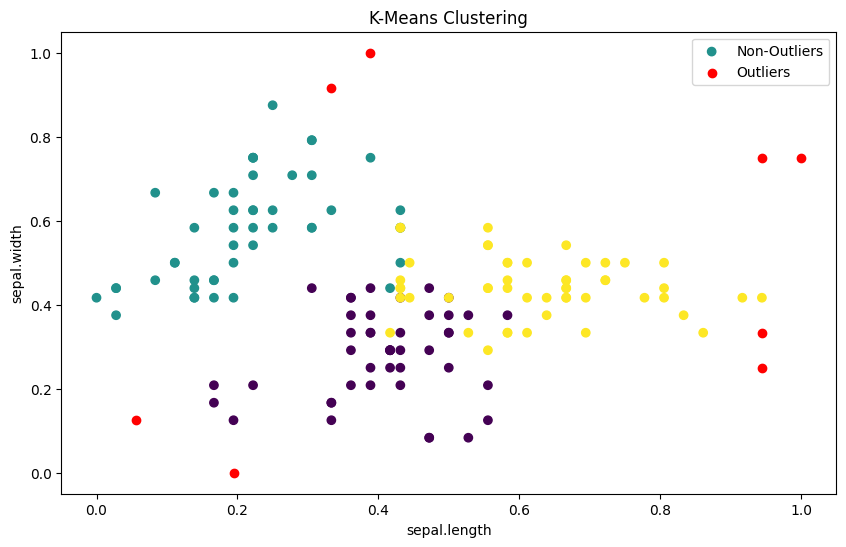

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

df4 = df2.copy()

# Select only numberical columns for scaling
numerical_cols = df4.select_dtypes(include=['float','int']).columns
X_num = df4[numerical_cols]

# Scale the numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Sử dụng KMeans để phân cụm dữ liệu
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df4['cluster'] = kmeans.labels_

#Tính khoảng cách từ các điểm dữ liệu đên tâm cụm
distances = cdist(X_scaled, kmeans.cluster_centers_, 'euclidean')
df4['distance_to_centroid'] = np.min(distances, axis=1)

# Xác định điểm ngoại lai dựa trên ngưỡng (vd: 95th percentile)
threshold = np.percentile(df4['distance_to_centroid'], 95)
outliers = df4[df4['distance_to_centroid'] > threshold ]
non_outliers = df4[df4['distance_to_centroid'] <= threshold ]

# Hiển thị các điểm ngoại lai và ko ngoại lai
print("Outliers:\n",outliers)
print("\nNon Outliers:\n",non_outliers)

# Plot các cụm và ngoại lai
# Assuming 'feature1' và 'feature2' are among the numerical columns
plt.figure(figsize=(10, 6))
plt.scatter(non_outliers['sepal.length'], non_outliers['sepal.width'], c=non_outliers['cluster'], cmap='viridis',label='Non-Outliers')
plt.scatter(outliers['sepal.length'], outliers['sepal.width'], c='red', label='Outliers')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.title('K-Means Clustering')
plt.legend()
plt.show()